# Raster plot with stimulus
## Import of modules
We begin with import of the modules we want to use

In [1]:
import numpy as np # numerical python gives us matlab functions
import matplotlib.pyplot as plt # plotting functions
# we want our plots to be visualized inside this notebook
%matplotlib notebook 
import quantities as pq # physical quantities is nice to use

Remember, that if you want help you can write a command and press tab, if that does not work put a question mark at the end of the function you want help with, like shown below

In [11]:
plt.plot?

we make a syntetic spiketrain

In [2]:
exp_duration = 10 * pq.s # experiment duration
n_spikes = 100 # number of spikes
sptr = np.random.random(n_spikes) * exp_duration # 100 random numbers between 0 and exp_duration
print sptr # write info below

[ 1.43909894  6.22925782  9.15047109  8.18004425  2.65737207  9.87855077
  2.09743487  0.42756955  1.41381614  8.77731464  5.33085728  6.33939123
  7.25820123  0.52494994  9.47072785  5.86829108  9.20796751  7.76260345
  6.99654012  2.20520047  0.37138272  4.67144975  3.40507019  4.80198173
  7.38696472  2.84080115  6.40168765  4.28609228  1.72004216  7.26222089
  7.98660488  5.01626748  0.13846764  1.86044234  7.28889978  7.28685323
  9.23335987  7.02706886  4.43222829  1.09681757  8.80378135  8.44619408
  1.75722837  6.19278236  6.32596938  8.87126379  8.755775    7.96154611
  1.03364798  0.41401749  3.78732547  9.88008027  3.33168765  8.0759897
  9.9189374   3.74864126  8.7506221   6.94796946  2.58677607  3.91861846
  0.40159899  4.61127167  5.85023026  6.73296522  1.05354416  6.50203159
  3.47125578  3.59622333  4.45131484  0.83638766  7.81406135  7.70355315
  2.14565059  0.71865042  7.68361881  5.1840631   5.31913771  7.8104416
  4.04618998  5.80817945  7.42185554  9.87850056  7.6

we make a syntetic stimulus

In [3]:
# define stimulus specifications
pulse_freq = 10 * pq.Hz
n_trials = 5
stim_phase = 50 * pq.ms

stim_trials = [] # make an empty list which we will fill later
stim_durations = [] # make an empty list which we will fill later
stim_start = []
stim_stop = []
for trial in range(n_trials): # make trials
    start_t = exp_duration / n_trials * trial + 1 * pq.s
    stop_t = exp_duration / n_trials * (1+trial)
    stims = np.arange(start_t, stop_t , 1/pulse_freq)
    stim_trials.append(stims * pq.s) # append fills the empty list
    stim_durations.append([stim_phase.magnitude] * len(stims) * stim_phase.units) # append fills the empty list
    stim_start.append(start_t)
    stim_stop.append(stop_t)
print stim_trials, '\n', stim_durations # write info below

[array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9]) * s, array([ 3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9]) * s, array([ 5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9]) * s, array([ 7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9]) * s, array([ 9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9]) * s] 
[array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]) * ms, array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]) * ms, array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]) * ms, array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]) * ms, array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]) * ms]


<IPython.core.display.Javascript object>


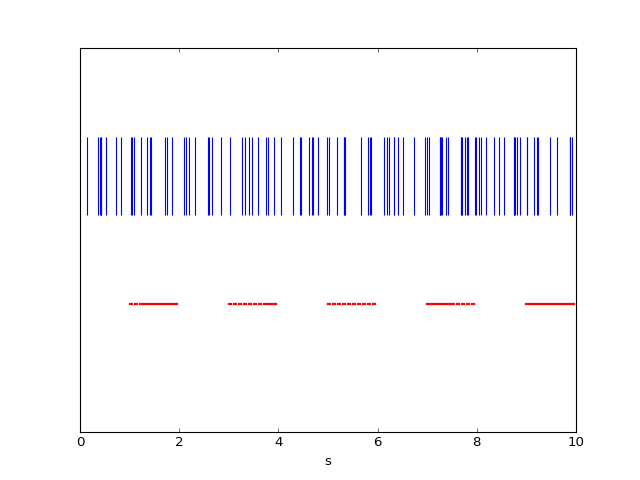

In [4]:
fig, ax = plt.subplots() # make a figure with axes
dim = exp_duration.dimensionality # make sure time has the same dimension in all temporal variables
ax.scatter(sptr, np.ones(len(sptr)), marker='|', s=5000) # add spikes to the axes
ax.set_xlim(0, exp_duration.magnitude)
ax.set_ylim(0.99, 1.005) # zoom in
ax.set_yticks([])
ax.set_xlabel(dim)
for trial in range(n_trials):
    for stim, duration in zip(stim_trials[trial].rescale(dim), stim_durations[trial].rescale(dim)):
        ax.plot([stim, stim+duration], [0.995, 0.995], lw=2, color='r') # add stimulus lines to axes

Now we want to allign spikes relative to stimulus and plot each trial

In [5]:
trial_vec = []
sp_vec = []
t_pre = exp_duration/2.
t_post = exp_duration/2.
for trial in range(n_trials):
    for sp in sptr[(sptr >= stim_start[trial] - t_pre) & (sptr <= stim_start[trial] + t_post)]:
        sp_vec.append(sp-stim_start[trial])
        trial_vec.append(trial)

The plotting is done similar as the previous plot

**Assignment:** add y-label with set_ylabel counting each trial, and add a legend with plt.legend

<IPython.core.display.Javascript object>


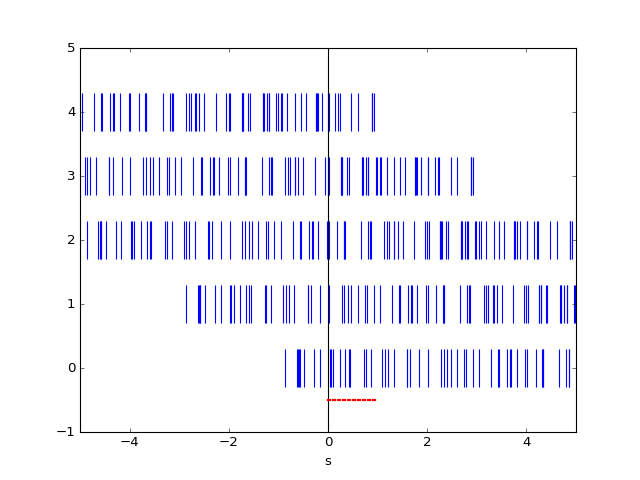

In [6]:
fig, ax = plt.subplots() # make a figure with axes
line_height = 6000./n_trials
ax.scatter(sp_vec, trial_vec, marker='|', s=line_height)
for stim, duration in zip(stim_trials[0].rescale(dim), stim_durations[0].rescale(dim)):
    ax.plot([stim-stim_start[0], stim+duration-stim_start[0]], [-.5, -.5], lw=2, color='r') # add stimulus lines to axes
ax.set_xlim(-t_pre, t_post)
ax.axvspan(0, 0, color='k')
ax.set_xlabel(dim)

**Assignment:** the first and the last spiketrains starts and stops respectively well inside the x-axis bounds giving the impression that there are no spikes near the edges here. Moreover we can not be sure that some spikes are repeatedly plottet in several trials. Change t_pre and t_post such that both these issues are prevented. 

**Assignment:** make a similar figure as above, however now we want to se spikes relative to each pulse in each trial

**Assignment:** Add a histogram above the plot you made, see example below

<IPython.core.display.Javascript object>


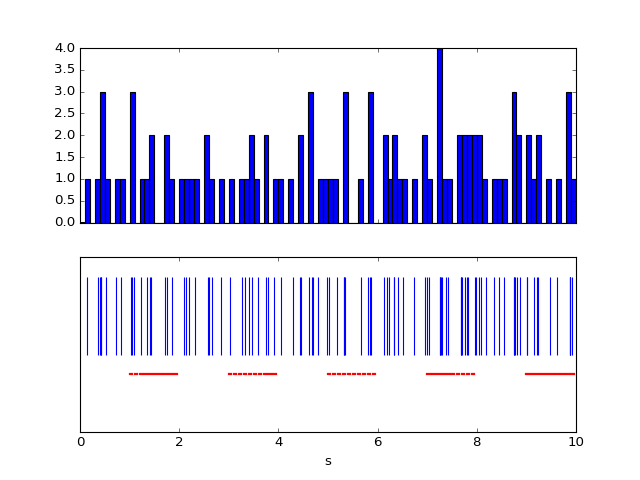

In [7]:
fig, axs = plt.subplots(2, 1, sharex=True) # make a figure with axes
binsize = 100 * pq.ms
start = 0 * pq.s
binsize = binsize.rescale(dim)
bins = np.arange(start.rescale(dim), exp_duration.rescale(dim)+binsize, binsize)
axs[0].hist(sptr.rescale(dim), bins=bins)

axs[1].scatter(sptr, np.ones(len(sptr)), marker='|', s=5000) # add spikes to the axes
axs[1].set_xlim(0, exp_duration.magnitude)
axs[1].set_ylim(0.99, 1.005) # zoom in
axs[1].set_yticks([])
axs[1].set_xlabel(dim)
for trial in range(n_trials):
    for stim, duration in zip(stim_trials[trial].rescale(dim), stim_durations[trial].rescale(dim)):
        axs[1].plot([stim, stim+duration], [0.995, 0.995], lw=2, color='r') # add stimulus lines to axes